In [1]:
# -*- coding: utf-8 -*-
import networkx as nx
import pandas as pd
pontos_linha = pd.read_csv("2022_03_08_pontosLinha.csv")

def get_pontos_linha(codigo_linha: str, id_itineratio: int) -> pd.core.frame.DataFrame:
    return pontos_linha.query("COD == @codigo_linha and ITINERARY_ID == @id_itineratio").sort_values("SEQ")

def add_pontos_no_grafo(grafo: nx.classes.graph.Graph, pontos_linha: pd.core.frame.DataFrame) -> None:
    for row in pontos_linha.itertuples(index=False):
        NOME = getattr(row, 'NOME')
        NUM = getattr(row, 'NUM')
        SEQ = getattr(row, 'SEQ')
        SENTIDO = getattr(row, 'SENTIDO')
        ITINERARY_ID = getattr(row, 'ITINERARY_ID')
        COD = getattr(row, 'COD')
        if 'Terminal' in NOME:
            NOME = NOME.split(' - ')[0]
        
        #Verifica se o nó/ponto já existe no grafo. Se sim, adiciona o código da linha na lista do nó/ponto já existente.
        #Se não, cria um novo nó/ponto no grafo.
        try:
            COD_outras_linhas = grafo.nodes(data=True)[NOME]['cod']
            if type(COD_outras_linhas) == list:
                COD_outras_linhas.append(COD)
            else:
                new = []
                new.append(COD_outras_linhas)
                COD_outras_linhas = new
                
            grafo.nodes(data=True)[NOME]['cod'] = list(set(COD_outras_linhas))
        except:
            grafo.add_node(NOME, nome=NOME, num=NUM, seq=SEQ, sentido=SENTIDO, itinerario_id=ITINERARY_ID, cod=COD)       

def add_arestas_entre_pontos(grafo: nx.classes.graph.Graph, pontos_linha: pd.core.frame.DataFrame) -> None:
    pontos = list(grafo.nodes(data=True))
    for i in range(1, len(pontos)):
        source = pontos[i-1][0]
        target = pontos[i][0]
        grafo.add_edge(source,target)

def get_linhas_por_terminal(nome_terminal: str) -> pd.core.frame.DataFrame:
    nome_terminal = f"{nome_terminal} -"
    codigos_linha = pontos_linha.query("NOME.str.contains(@nome_terminal)", engine="python").groupby("COD")
    return list(codigos_linha.groups.keys())

def get_itinerarios_por_linha(codigo_linha: str) -> list:
    return list(pontos_linha.query("COD == @codigo_linha").sort_values("ITINERARY_ID").groupby("ITINERARY_ID").groups.keys())

In [2]:
linhas = get_linhas_por_terminal("Terminal Oficinas")
linhas

['030', '050', '302', '303', '321', '322', '323']

In [3]:
grafo = nx.Graph()
aaa = {}
for codigo_linha in linhas:
    id_itinerario = get_itinerarios_por_linha(codigo_linha)[0]
    pontos = get_pontos_linha(codigo_linha, id_itinerario)
    aaa[codigo_linha] = pontos
    add_pontos_no_grafo(grafo, pontos)
    add_arestas_entre_pontos(grafo, pontos)
    #print(f"{codigo_linha} - {id_itinerario} - {len(pontos)}")

zzz = pontos_linha.query("COD in ('030', '050', '302', '303', '321', '322', '323') and ITINERARY_ID in (488, 492, 2325, 1346, 10653, 10633, 634)")
zzz.sort_values("NOME")

aaa["030"]

b = list(aaa["030"]["NUM"])
a = list(aaa["050"]["NUM"])
count = 0
for ponto in b:
    if ponto in a:
        print(ponto)
        count += 1
        
print(count)

In [4]:
len(grafo.nodes())

201

In [5]:
len(grafo.edges)

200

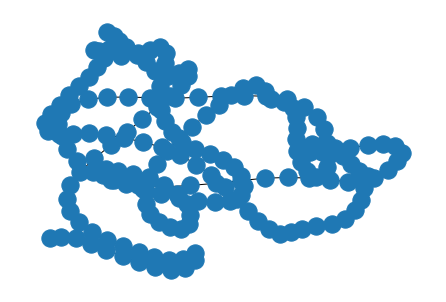

In [6]:
nx.draw(grafo)

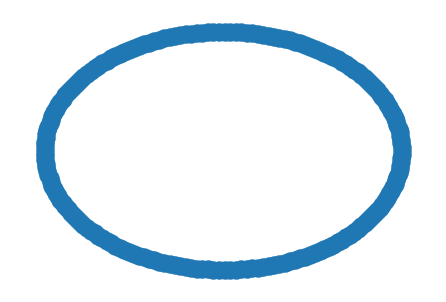

In [7]:
nx.draw_circular(grafo)

In [8]:
nx.write_gml(grafo, 'Terminal_Oficinas.gml')

In [9]:
grafo.nodes(data=True)["Terminal Oficinas"]

{'nome': 'Terminal Oficinas',
 'num': 105606,
 'seq': 47,
 'sentido': 'Terminal Santa Cândida Final de semana',
 'itinerario_id': 488,
 'cod': ['303', '321', '323', '322', '030', '302']}